# ex_boston_house

## 0. 連接雲端硬碟，起始準備

In [1]:
# 連接雲端硬碟，起始準備

from google.colab import drive
drive.mount('/content/drive')

# 移到資料夾
%cd /content/drive/MyDrive/class_AI/ex_boston_housing/
!pwd
!ls

Mounted at /content/drive
/content/drive/MyDrive/class_AI/ex_boston_housing
/content/drive/MyDrive/class_AI/ex_boston_housing
1_MLP_regression.ipynb	2_MLP_regression_valide.ipynb  boston_housing.csv


## 預備知識 (Pandas 轉為 Numpy)

In [2]:
# 預備知識 (Pandas 轉為 Numpy)

import numpy as np
import pandas as pd

# Creating the DataFrame
df = pd.DataFrame({
  'Weight':[45, 88, 56, 15, 71],
  'Name':['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'],
  'Age':[14, 25, 55, 8, 21]
})

# Print the DataFrame
print(df)

   Weight    Name  Age
0      45     Sam   14
1      88  Andrea   25
2      56    Alex   55
3      15   Robin    8
4      71     Kia   21


In [3]:
# return the numpy representation of
# this dataframe
result = df.values

# Print the result
print(result)

[[45 'Sam' 14]
 [88 'Andrea' 25]
 [56 'Alex' 55]
 [15 'Robin' 8]
 [71 'Kia' 21]]


## 1. MLP 模型 - Regression

In [4]:
# 匯入套件模組
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


## 資料預處理
比較方法一與方法二
- (1) DIY，使用標準化
- (2) 使用 Kaggle 資料集，似乎是正規化

### 資料預處理 (方法一：DIY）

In [ ]:
# 載入波士頓房屋資料集
df = pd.read_csv("./boston_housing.csv")

print(df.head())
print(df.shape)


In [ ]:
# 轉換為 numpy
dataset = df.values
print(dataset)

In [ ]:
# 分割成特徵資料和標籤資料
x = dataset[:, 0:13]
y = dataset[:, 13]

# 特徵標準化
x -= x.mean(axis=0)
x /= x.std(axis=0)
# 分割訓練和測試資料集

x_train, y_train = x[:404], y[:404]     # 訓練資料前404筆
x_test, y_test = x[404:], y[404:]       # 測試資料後102筆

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


### 資料預處理 (方法二：直接使用資料集)

In [5]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


57026/57026 [==============================] - 0s 1us/step
(404, 13)
(404,)
(102, 13)
(102,)


### 定義模型

In [12]:
# 定義模型
model = Sequential()
model.add(Dense(32, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# 編譯模型
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [13]:
# 訓練模型
history = model.fit(x_train, y_train, epochs=1080, batch_size=16, verbose=0)


In [14]:
# 使用測試資料評估模型
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print('MSE_test: ', mse)
print('MAE_test: ', mae)


MSE_test:  21.929750442504883
MAE_test:  3.058306932449341


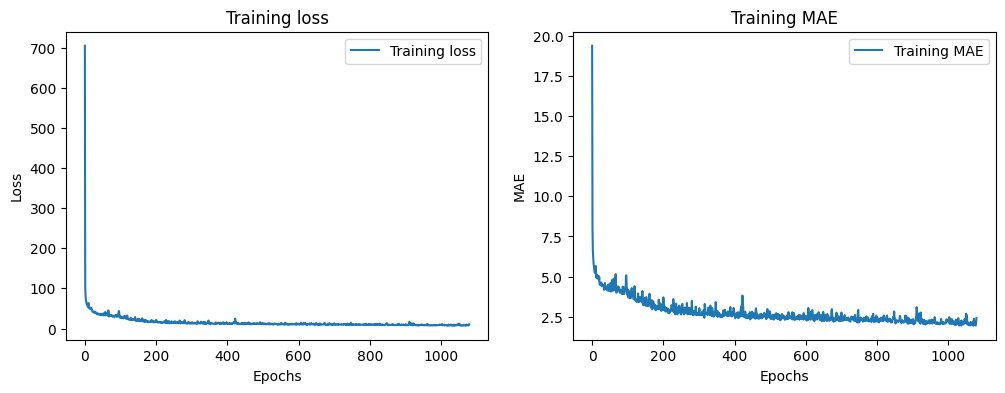

In [15]:
# prompt: 用history.history畫圖

import matplotlib.pyplot as plt

# Get the loss and accuracy values from the history dictionary
loss = history.history['loss']
mae = history.history['mae']

# Get the number of epochs
epochs = range(len(loss))

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, label='Training MAE')
plt.title('Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Show the plot
plt.show()
